
***Import Libraries For Data Analysis***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Importing Heart Disease Prediction Dataset**

In [ ]:
filename="HeartDiseasePrediction.csv"
df=pd.read_csv(filename)

In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


**Calculating Number of Rows in Data Set**

In [ ]:
len(df)

4240

In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


**Graph Between Heart Disease And Age**

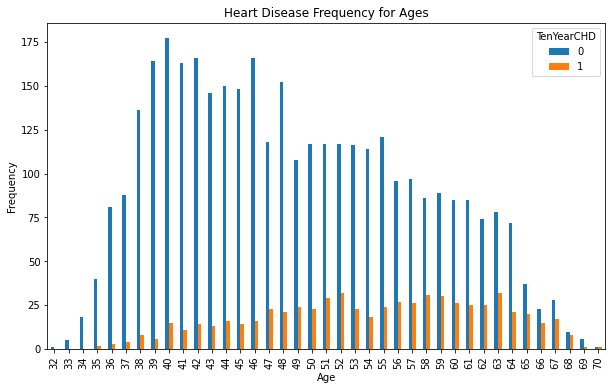

In [ ]:
pd.crosstab(df.age, df.TenYearCHD).plot(kind="bar", figsize=(10, 6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Graph Between Gender And Heart Disease**

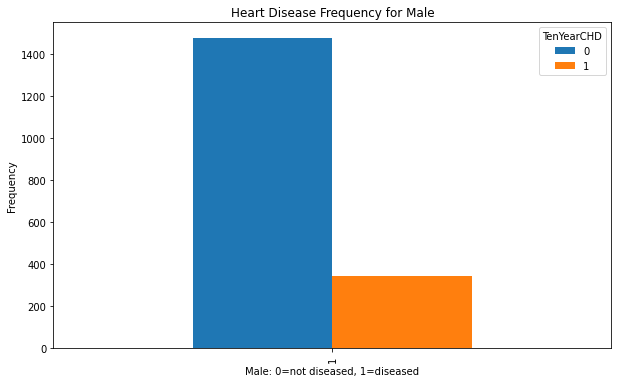

In [ ]:
pd.crosstab(df[(df.male==1)].male, df.TenYearCHD).plot(kind="bar", figsize=(10, 6))
plt.title('Heart Disease Frequency for Male')
plt.xlabel('Male: 0=not diseased, 1=diseased')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Frequency')

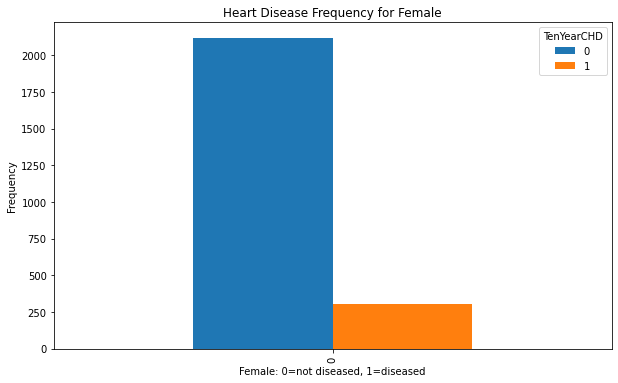

In [ ]:
pd.crosstab(df[(df.male == 0)].male, df.TenYearCHD).plot(kind="bar", figsize=(10, 6))
plt.title('Heart Disease Frequency for Female')
plt.xlabel('Female: 0=not diseased, 1=diseased')
plt.ylabel('Frequency')

**Pie Chart Between Diabetes and Heart Disease**

([<matplotlib.patches.Wedge at 0x7fea4bc6f9e8>,
 [Text(0.4464446643545258, 1.0053293796907434, 'Heart Disease'),
  Text(-0.44644475848025345, -1.0053293378915729, 'Not Heart Disease')])

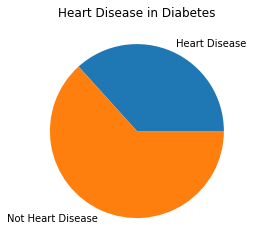

In [ ]:
disease_in_diabetes=len(df[(df.diabetes==1) & (df.TenYearCHD==1)])
not_disease_in_diabetes=len(df[(df.diabetes==1) & (df.TenYearCHD==0)])
data=[disease_in_diabetes,not_disease_in_diabetes]
plt.title('Heart Disease in Diabetes')
label=['Heart Disease','Not Heart Disease']
plt.pie(data,labels=label)

**Finding Correlation Between Independent variable and dependent Variable**

In [ ]:
correlations=df.corr()
print(pd.DataFrame(correlations['TenYearCHD']).sort_values(by='TenYearCHD',ascending=False))

                 TenYearCHD
TenYearCHD         1.000000
age                0.225408
sysBP              0.216374
prevalentHyp       0.177458
diaBP              0.145112
glucose            0.125590
diabetes           0.097344
male               0.088374
BPMeds             0.087519
totChol            0.082369
BMI                0.075300
prevalentStroke    0.061823
cigsPerDay         0.057755
heartRate          0.022907
currentSmoker      0.019448
education         -0.054248


After Finding Correlation between variables , we Decided to drop current Smoker and Education columns and it also imporve our accuracy about 2-3%.

In [ ]:
df.drop(['currentSmoker'],axis=1,inplace=True)
df.drop(['education'],axis=1,inplace=True)

**Data Wrangling**

**Calculating Number of Rows having Null Values**

In [ ]:
df.isnull().sum()

male                 0
age                  0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  489
since it is only 12 percent of the entire dataset the rows with missing values are excluded.


In [ ]:
df.dropna(axis=0,inplace=True)